In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets

In [3]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    " Return the sigmoid function "
    y = 1/(1 + np.exp(-z))
    return y

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot((1 - labels), np.log(1 - predictions))

    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = - (cost/observations)

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = len(features.columns)# number of features

    #1 - Get Predictions
    predictions = predict(features, weights)
    

    gradient = np.dot((predictions - labels) , features)# Write down the gradient of the cost

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - lr * gradient# Write down the update rule here

    return weights

def decision_boundary(prob):
    return 1 if prob >= .5 else 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [4]:
data = pd.read_csv("winequality-red.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Function to print all the missing data in the dataset
def print_missing_data(d):
    total = d.isnull().sum().sort_values(ascending = False)
    percentage = round(d.isnull().sum().sort_values(ascending = False) * 100 / len(d), 3)
    return pd.concat([total,percentage], axis = 1, keys = ['Total', 'Percentage'] )

print(print_missing_data(data))

                      Total  Percentage
fixed acidity             0         0.0
volatile acidity          0         0.0
citric acid               0         0.0
residual sugar            0         0.0
chlorides                 0         0.0
free sulfur dioxide       0         0.0
total sulfur dioxide      0         0.0
density                   0         0.0
pH                        0         0.0
sulphates                 0         0.0
alcohol                   0         0.0
quality                   0         0.0


In [7]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [15]:
X = data[data.columns[:-1]]
y = np.array(data['quality'])

In [16]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state= 42)

In [21]:
train_data = []
for i in np.unique(y_train) :
    l1 = np.zeros(len(y_train))
    l1[np.where(y_train == i)] = 1
    train_data.append(l1)


In [22]:
test_data = []
for i in np.unique(y_test) :
    l1 = np.zeros(len(y_test))
    l1[np.where(y_test == i)] = 1
    test_data.append(l1)

In [23]:
weights = []
losses = []
for i in train_data :
    # Initialize the weights
    wts = np.random.normal(0, 1, len(x_train.columns))
    # Training
    optimal_wts, loss = train(x_train, i, wts, 1e-5, 1000)
    weights.append(optimal_wts)
    losses.append(loss)
    

iter: 0 cost: 0.2023917313483416
iter: 1 cost: 0.2023246005361233
iter: 2 cost: 0.2022574697239073
iter: 3 cost: 0.20219033891169358
iter: 4 cost: 0.20212320809948225
iter: 5 cost: 0.2020560772872733
iter: 6 cost: 0.20198894647506666
iter: 7 cost: 0.20192181566286246
iter: 8 cost: 0.20185468485066066
iter: 9 cost: 0.20178755403846127
iter: 10 cost: 0.20172042322626435
iter: 11 cost: 0.20165329241406987
iter: 12 cost: 0.2015861616018779
iter: 13 cost: 0.20151903078968839
iter: 14 cost: 0.2014518999775014
iter: 15 cost: 0.20138476916531695
iter: 16 cost: 0.20131763835313501
iter: 17 cost: 0.2012505075409557
iter: 18 cost: 0.20118337672877895
iter: 19 cost: 0.2011162459166048
iter: 20 cost: 0.2010491151044333
iter: 21 cost: 0.20098198429226438
iter: 22 cost: 0.2009148534800982
iter: 23 cost: 0.20084772266793469
iter: 24 cost: 0.20078059185577382
iter: 25 cost: 0.2007134610436157
iter: 26 cost: 0.2006463302314603
iter: 27 cost: 0.2005791994193077
iter: 28 cost: 0.20051206860715787
iter: 29

iter: 478 cost: 0.170303205156369
iter: 479 cost: 0.17023607437131424
iter: 480 cost: 0.1701689435866996
iter: 481 cost: 0.17010181280253384
iter: 482 cost: 0.17003468201882596
iter: 483 cost: 0.16996755123558516
iter: 484 cost: 0.16990042045282086
iter: 485 cost: 0.1698332896705427
iter: 486 cost: 0.16976615888876057
iter: 487 cost: 0.16969902810748455
iter: 488 cost: 0.169631897326725
iter: 489 cost: 0.16956476654649247
iter: 490 cost: 0.16949763576679788
iter: 491 cost: 0.16943050498765222
iter: 492 cost: 0.16936337420906689
iter: 493 cost: 0.16929624343105362
iter: 494 cost: 0.16922911265362423
iter: 495 cost: 0.1691619818767909
iter: 496 cost: 0.16909485110056618
iter: 497 cost: 0.16902772032496288
iter: 498 cost: 0.16896058954999407
iter: 499 cost: 0.16889345877567322
iter: 500 cost: 0.16882632800201408
iter: 501 cost: 0.16875919722903068
iter: 502 cost: 0.16869206645673754
iter: 503 cost: 0.16862493568514944
iter: 504 cost: 0.16855780491428154
iter: 505 cost: 0.16849067414414937

iter: 933 cost: 0.14266424940033082
iter: 934 cost: 0.1426469850038082
iter: 935 cost: 0.14262983678709357
iter: 936 cost: 0.14261280003914428
iter: 937 cost: 0.1425958702542213
iter: 938 cost: 0.14257904312297273
iter: 939 cost: 0.14256231452383714
iter: 940 cost: 0.14254568051476718
iter: 941 cost: 0.14252913732527034
iter: 942 cost: 0.1425126813487627
iter: 943 cost: 0.14249630913523087
iter: 944 cost: 0.14248001738419555
iter: 945 cost: 0.1424638029379697
iter: 946 cost: 0.14244766277520354
iter: 947 cost: 0.14243159400470826
iter: 948 cost: 0.1424155938595494
iter: 949 cost: 0.14239965969140203
iter: 950 cost: 0.14238378896515688
iter: 951 cost: 0.14236797925377073
iter: 952 cost: 0.14235222823334936
iter: 953 cost: 0.1423365336784564
iter: 954 cost: 0.14232089345763693
iter: 955 cost: 0.1423053055291487
iter: 956 cost: 0.14228976793689121
iter: 957 cost: 0.14227427880652493
iter: 958 cost: 0.1422588363417717
iter: 959 cost: 0.14224343882088866
iter: 960 cost: 0.1422280845933084
i

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_14272/2526348343.py:40: RuntimeWarning: divide by zero encountered in log
  class2_cost = np.dot((1 - labels), np.log(1 - predictions))


iter: 139 cost: 0.30875205609429224
iter: 140 cost: 0.30853908559855125
iter: 141 cost: 0.30832670176636845
iter: 142 cost: 0.3081148978759134
iter: 143 cost: 0.3079036675611513
iter: 144 cost: 0.30769300479368034
iter: 145 cost: 0.3074829038654921
iter: 146 cost: 0.30727335937260436
iter: 147 cost: 0.3070643661995215
iter: 148 cost: 0.30685591950447644
iter: 149 cost: 0.3066480147054141
iter: 150 cost: 0.3064406474666762
iter: 151 cost: 0.30623381368635
iter: 152 cost: 0.30602750948424806
iter: 153 cost: 0.30582173119048295
iter: 154 cost: 0.30561647533460967
iter: 155 cost: 0.3054117386353014
iter: 156 cost: 0.3052075179905366
iter: 157 cost: 0.30500381046826597
iter: 158 cost: 0.3048006132975381
iter: 159 cost: 0.3045979238600583
iter: 160 cost: 0.3043957396821593
iter: 161 cost: 0.3041940584271632
iter: 162 cost: 0.3039928778881134
iter: 163 cost: 0.3037921959808597
iter: 164 cost: 0.3035920107374771
iter: 165 cost: 0.3033923203000024
iter: 166 cost: 0.3031931229144728
iter: 167 co

iter: 564 cost: 0.2545510156622799
iter: 565 cost: 0.25447999083772627
iter: 566 cost: 0.2544091038377566
iter: 567 cost: 0.2543383540428444
iter: 568 cost: 0.2542677408362881
iter: 569 cost: 0.25419726360420175
iter: 570 cost: 0.2541269217355056
iter: 571 cost: 0.2540567146219168
iter: 572 cost: 0.25398664165793977
iter: 573 cost: 0.25391670224085666
iter: 574 cost: 0.2538468957707183
iter: 575 cost: 0.2537772216503342
iter: 576 cost: 0.25370767928526317
iter: 577 cost: 0.2536382680838041
iter: 578 cost: 0.2535689874569858
iter: 579 cost: 0.25349983681855814
iter: 580 cost: 0.25343081558498176
iter: 581 cost: 0.2533619231754192
iter: 582 cost: 0.25329315901172483
iter: 583 cost: 0.2532245225184352
iter: 584 cost: 0.25315601312275976
iter: 585 cost: 0.2530876302545712
iter: 586 cost: 0.25301937334639546
iter: 587 cost: 0.25295124183340234
iter: 588 cost: 0.252883235153396
iter: 589 cost: 0.2528153527468052
iter: 590 cost: 0.25274759405667346
iter: 591 cost: 0.25267995852864955
iter: 59

iter: 958 cost: 0.23307754070552936
iter: 959 cost: 0.2330328967376902
iter: 960 cost: 0.23298828217516887
iter: 961 cost: 0.23294369693240807
iter: 962 cost: 0.23289914092429365
iter: 963 cost: 0.23285461406615182
iter: 964 cost: 0.23281011627374756
iter: 965 cost: 0.23276564746328177
iter: 966 cost: 0.2327212075513895
iter: 967 cost: 0.2326767964551375
iter: 968 cost: 0.23263241409202212
iter: 969 cost: 0.23258806037996704
iter: 970 cost: 0.23254373523732103
iter: 971 cost: 0.2324994385828561
iter: 972 cost: 0.23245517033576502
iter: 973 cost: 0.23241093041565922
iter: 974 cost: 0.23236671874256692
iter: 975 cost: 0.23232253523693067
iter: 976 cost: 0.2322783798196053
iter: 977 cost: 0.23223425241185616
iter: 978 cost: 0.23219015293535653
iter: 979 cost: 0.23214608131218592
iter: 980 cost: 0.23210203746482763
iter: 981 cost: 0.23205802131616735
iter: 982 cost: 0.23201403278949023
iter: 983 cost: 0.2319700718084796
iter: 984 cost: 0.23192613829721445
iter: 985 cost: 0.2318822321801677

iter: 312 cost: 1.0305789967666785
iter: 313 cost: 1.0303414022338746
iter: 314 cost: 1.0301045897263077
iter: 315 cost: 1.0298685479127376
iter: 316 cost: 1.0296332656624598
iter: 317 cost: 1.0293987320412767
iter: 318 cost: 1.0291649363077715
iter: 319 cost: 1.028931867909068
iter: 320 cost: 1.0286995164772677
iter: 321 cost: 1.028467871825745
iter: 322 cost: 1.028236923945371
iter: 323 cost: 1.028006663000974
iter: 324 cost: 1.0277770793281316
iter: 325 cost: 1.0275481634293107
iter: 326 cost: 1.02731990597112
iter: 327 cost: 1.0270922977805306
iter: 328 cost: 1.0268653298421273
iter: 329 cost: 1.0266389932947133
iter: 330 cost: 1.0264132794284906
iter: 331 cost: 1.0261881796819605
iter: 332 cost: 1.0259636856390262
iter: 333 cost: 1.0257397890263926
iter: 334 cost: 1.0255164817103481
iter: 335 cost: 1.0252937556945234
iter: 336 cost: 1.025071603116907
iter: 337 cost: 1.0248500162473886
iter: 338 cost: 1.0246289874853034
iter: 339 cost: 1.0244085093567885
iter: 340 cost: 1.024188574

iter: 668 cost: 0.9639197959703758
iter: 669 cost: 0.9637524777614739
iter: 670 cost: 0.9635852211261671
iter: 671 cost: 0.9634180259928904
iter: 672 cost: 0.9632508922911623
iter: 673 cost: 0.9630838199515606
iter: 674 cost: 0.9629168089055874
iter: 675 cost: 0.9627498590857682
iter: 676 cost: 0.9625829704256086
iter: 677 cost: 0.9624161428595737
iter: 678 cost: 0.962249376323096
iter: 679 cost: 0.9620826707524839
iter: 680 cost: 0.9619160260850579
iter: 681 cost: 0.9617494422589888
iter: 682 cost: 0.9615829192133877
iter: 683 cost: 0.9614164568882627
iter: 684 cost: 0.9612500552244692
iter: 685 cost: 0.961083714163745
iter: 686 cost: 0.9609174336486891
iter: 687 cost: 0.9607512136227803
iter: 688 cost: 0.9605850540302466
iter: 689 cost: 0.9604189548162407
iter: 690 cost: 0.9602529159266747
iter: 691 cost: 0.960086937308242
iter: 692 cost: 0.9599210189085172
iter: 693 cost: 0.9597551606757808
iter: 694 cost: 0.9595893625591169
iter: 695 cost: 0.9594236245083497
iter: 696 cost: 0.95925

iter: 42 cost: 7.5087604150103955
iter: 43 cost: 7.18445295416169
iter: 44 cost: 6.86018536862091
iter: 45 cost: 6.535994193542911
iter: 46 cost: 6.211966503421153
iter: 47 cost: 5.888323060558133
iter: 48 cost: 5.565631972701502
iter: 49 cost: 5.245261374755788
iter: 50 cost: 4.92990519948067
iter: 51 cost: 4.623181374629893
iter: 52 cost: 4.3279097032765605
iter: 53 cost: 4.045423214357651
iter: 54 cost: 3.7763871907055084
iter: 55 cost: 3.5221127471422013
iter: 56 cost: 3.285536505223495
iter: 57 cost: 3.0702165873108482
iter: 58 cost: 2.877711099936712
iter: 59 cost: 2.707646097322264
iter: 60 cost: 2.557936867535632
iter: 61 cost: 2.427414350324369
iter: 62 cost: 2.3154817280923283
iter: 63 cost: 2.221130377543983
iter: 64 cost: 2.14286531715696
iter: 65 cost: 2.0788342263630355
iter: 66 cost: 2.027106137695527
iter: 67 cost: 1.9857180489434942
iter: 68 cost: 1.9527451105762328
iter: 69 cost: 1.9264946128921794
iter: 70 cost: 1.9055708298245546
iter: 71 cost: 1.888836569930249
ite

iter: 318 cost: 1.1804849790600143
iter: 319 cost: 1.1783325026879763
iter: 320 cost: 1.176185610479298
iter: 321 cost: 1.1740443180419562
iter: 322 cost: 1.1719086409758266
iter: 323 cost: 1.1697785948717405
iter: 324 cost: 1.1676541953105373
iter: 325 cost: 1.16553545786211
iter: 326 cost: 1.1634223980844784
iter: 327 cost: 1.1613150315227942
iter: 328 cost: 1.15921337370833
iter: 329 cost: 1.1571174401575117
iter: 330 cost: 1.1550272463708806
iter: 331 cost: 1.1529428078320703
iter: 332 cost: 1.150864140006767
iter: 333 cost: 1.1487912583416289
iter: 334 cost: 1.1467241782632454
iter: 335 cost: 1.1446629151770176
iter: 336 cost: 1.1426074844660696
iter: 337 cost: 1.1405579014901317
iter: 338 cost: 1.138514181584399
iter: 339 cost: 1.136476340058388
iter: 340 cost: 1.1344443921947516
iter: 341 cost: 1.132418353248127
iter: 342 cost: 1.1303982384439217
iter: 343 cost: 1.1283840629770936
iter: 344 cost: 1.126375842010919
iter: 345 cost: 1.124373590675764
iter: 346 cost: 1.1223773240677

iter: 732 cost: 0.793259502307611
iter: 733 cost: 0.7931026273255619
iter: 734 cost: 0.7929465137446616
iter: 735 cost: 0.7927911512315878
iter: 736 cost: 0.7926365295924535
iter: 737 cost: 0.7924826387712994
iter: 738 cost: 0.7923294688485923
iter: 739 cost: 0.7921770100397278
iter: 740 cost: 0.7920252526935381
iter: 741 cost: 0.7918741872908084
iter: 742 cost: 0.7917238044427961
iter: 743 cost: 0.7915740948897594
iter: 744 cost: 0.7914250494994909
iter: 745 cost: 0.7912766592658601
iter: 746 cost: 0.7911289153073626
iter: 747 cost: 0.790981808865676
iter: 748 cost: 0.790835331304226
iter: 749 cost: 0.7906894741067595
iter: 750 cost: 0.7905442288759253
iter: 751 cost: 0.7903995873318663
iter: 752 cost: 0.790255541310818
iter: 753 cost: 0.7901120827637167
iter: 754 cost: 0.7899692037548178
iter: 755 cost: 0.789826896460324
iter: 756 cost: 0.7896851531670208
iter: 757 cost: 0.7895439662709248
iter: 758 cost: 0.7894033282759395
iter: 759 cost: 0.7892632317925239
iter: 760 cost: 0.7891236

iter: 100 cost: 0.8249636425855014
iter: 101 cost: 0.8241187792461971
iter: 102 cost: 0.8232756742493724
iter: 103 cost: 0.8224343138469541
iter: 104 cost: 0.8215946849881343
iter: 105 cost: 0.8207567752237277
iter: 106 cost: 0.8199205726249492
iter: 107 cost: 0.8190860657144383
iter: 108 cost: 0.8182532434076913
iter: 109 cost: 0.8174220949633291
iter: 110 cost: 0.8165926099408718
iter: 111 cost: 0.8157647781648879
iter: 112 cost: 0.814938589694556
iter: 113 cost: 0.8141140347978203
iter: 114 cost: 0.8132911039294481
iter: 115 cost: 0.8124697877123979
iter: 116 cost: 0.8116500769219956
iter: 117 cost: 0.8108319624724972
iter: 118 cost: 0.8100154354056697
iter: 119 cost: 0.8092004868810903
iter: 120 cost: 0.8083871081678975
iter: 121 cost: 0.8075752906377761
iter: 122 cost: 0.8067650257589847
iter: 123 cost: 0.8059563050912698
iter: 124 cost: 0.8051491202815296
iter: 125 cost: 0.8043434630601084
iter: 126 cost: 0.8035393252376329
iter: 127 cost: 0.8027366987022985
iter: 128 cost: 0.801

iter: 526 cost: 0.5623210818644654
iter: 527 cost: 0.5618812496711891
iter: 528 cost: 0.5614422051703372
iter: 529 cost: 0.5610039486358551
iter: 530 cost: 0.5605664803422571
iter: 531 cost: 0.560129800564594
iter: 532 cost: 0.5596939095784226
iter: 533 cost: 0.5592588076597725
iter: 534 cost: 0.5588244950851178
iter: 535 cost: 0.5583909721313418
iter: 536 cost: 0.5579582390757082
iter: 537 cost: 0.5575262961958276
iter: 538 cost: 0.557095143769626
iter: 539 cost: 0.5566647820753124
iter: 540 cost: 0.5562352113913471
iter: 541 cost: 0.5558064319964082
iter: 542 cost: 0.5553784441693596
iter: 543 cost: 0.5549512481892176
iter: 544 cost: 0.5545248443351182
iter: 545 cost: 0.554099232886283
iter: 546 cost: 0.5536744141219869
iter: 547 cost: 0.5532503883215227
iter: 548 cost: 0.552827155764168
iter: 549 cost: 0.55240471672915
iter: 550 cost: 0.5519830714956117
iter: 551 cost: 0.551562220342576
iter: 552 cost: 0.5511421635489109
iter: 553 cost: 0.5507229013932938
iter: 554 cost: 0.550304434

iter: 929 cost: 0.44826509415734594
iter: 930 cost: 0.4481218561247532
iter: 931 cost: 0.4479791535362096
iter: 932 cost: 0.4478369850724353
iter: 933 cost: 0.4476953494147483
iter: 934 cost: 0.44755424524505383
iter: 935 cost: 0.4474136712458325
iter: 936 cost: 0.44727362610012944
iter: 937 cost: 0.4471341084915424
iter: 938 cost: 0.44699511710420914
iter: 939 cost: 0.4468566506227959
iter: 940 cost: 0.44671870773248384
iter: 941 cost: 0.44658128711895817
iter: 942 cost: 0.4464443874683934
iter: 943 cost: 0.4463080074674413
iter: 944 cost: 0.4461721458032173
iter: 945 cost: 0.44603680116328703
iter: 946 cost: 0.445901972235653
iter: 947 cost: 0.4457676577087403
iter: 948 cost: 0.4456338562713833
iter: 949 cost: 0.4455005666128109
iter: 950 cost: 0.4453677874226331
iter: 951 cost: 0.445235517390826
iter: 952 cost: 0.4451037552077179
iter: 953 cost: 0.4449724995639742
iter: 954 cost: 0.44484174915058344
iter: 955 cost: 0.4447115026588419
iter: 956 cost: 0.4445817587803394
iter: 957 cost

iter: 373 cost: 0.3246360135816357
iter: 374 cost: 0.32461797390034974
iter: 375 cost: 0.32459815230915157
iter: 376 cost: 0.3245783308252166
iter: 377 cost: 0.32455850950250426
iter: 378 cost: 0.32454045625553907
iter: 379 cost: 0.3245206319175697
iter: 380 cost: 0.3245008079087264
iter: 381 cost: 0.3244809842771881
iter: 382 cost: 0.32446291850707437
iter: 383 cost: 0.324443092328476
iter: 384 cost: 0.32442326668822
iter: 385 cost: 0.32440519218150765
iter: 386 cost: 0.32438536433282006
iter: 387 cost: 0.32436553717389827
iter: 388 cost: 0.32434745446923613
iter: 389 cost: 0.32432762543265165
iter: 390 cost: 0.324307797232326
iter: 391 cost: 0.324287969911457
iter: 392 cost: 0.32426987708502397
iter: 393 cost: 0.3242500482999431
iter: 394 cost: 0.3242302205335917
iter: 395 cost: 0.3242121206977117
iter: 396 cost: 0.32419229176478565
iter: 397 cost: 0.3241724639865217
iter: 398 cost: 0.3241543576248759
iter: 399 cost: 0.3241345289683316
iter: 400 cost: 0.3241147015940241
iter: 401 cos

iter: 755 cost: 0.3173944298640697
iter: 756 cost: 0.3173755749748714
iter: 757 cost: 0.3173567237968831
iter: 758 cost: 0.31733787632560895
iter: 759 cost: 0.3173202076455464
iter: 760 cost: 0.3173013660323853
iter: 761 cost: 0.31728252812296126
iter: 762 cost: 0.317263693911502
iter: 763 cost: 0.3172460338652691
iter: 764 cost: 0.317227205510436
iter: 765 cost: 0.31720838084672676
iter: 766 cost: 0.3171895598722505
iter: 767 cost: 0.31717074258772354
iter: 768 cost: 0.31715309335506486
iter: 769 cost: 0.317134281916756
iter: 770 cost: 0.3171154741602763
iter: 771 cost: 0.31709667008377546
iter: 772 cost: 0.31707902951950073
iter: 773 cost: 0.31706023128627353
iter: 774 cost: 0.31704143672490215
iter: 775 cost: 0.3170226458335561
iter: 776 cost: 0.3170038586104189
iter: 777 cost: 0.3169862288989351
iter: 778 cost: 0.31696744751369693
iter: 779 cost: 0.3169486697885596
iter: 780 cost: 0.3169298957217278
iter: 781 cost: 0.31691112531273513
iter: 782 cost: 0.3168935064764812
iter: 783 co

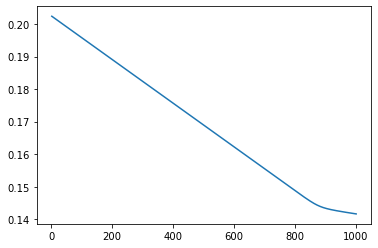

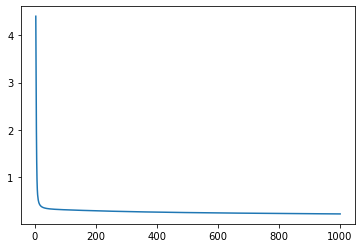

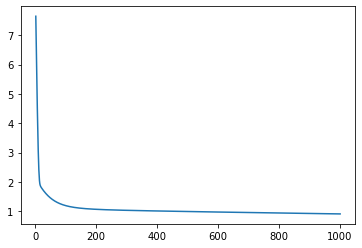

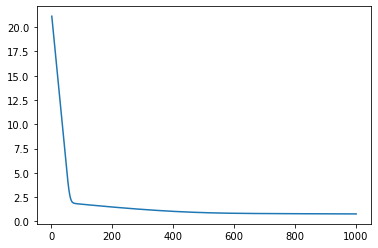

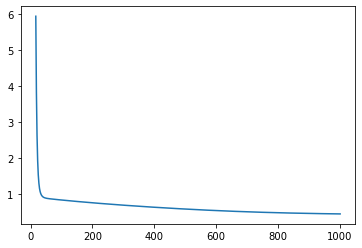

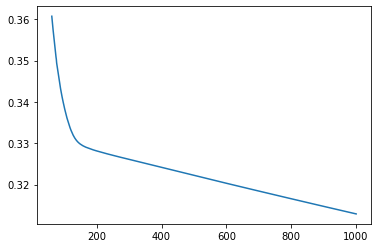

In [24]:
# Plot the loss against the number of epochs
for i in losses:
    plt.plot(np.arange(1, len(i)+1, 1), i)
    plt.show()

In [25]:
pred = []
for i in weights:
    predictions = []
    for elem in predict(x_train, i):
        predictions.append(decision_boundary(elem))
    pred.append(predictions)

In [26]:
test_pred = []
for i in weights:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred.append(predictions)

In [31]:
# Accuracy
for i in range(len(np.unique(y_train))):
    print("Training Accuracy using gradient descent: {0:.2f}%".format(accuracy(pred[i],train_data[i]) * 100))

Training Accuracy using gradient descent: 99.11%
Training Accuracy using gradient descent: 95.71%
Training Accuracy using gradient descent: 52.64%
Training Accuracy using gradient descent: 57.64%
Training Accuracy using gradient descent: 86.33%
Training Accuracy using gradient descent: 98.39%


In [32]:
# Accuracy
gd_acc = []
for i in range(len(np.unique(y_test))):
    gd_acc.append(accuracy(test_pred[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {0:.2f}%".format(accuracy(test_pred[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 99.58%
Testing Accuracy using gradient descent: 95.21%
Testing Accuracy using gradient descent: 54.17%
Testing Accuracy using gradient descent: 53.75%
Testing Accuracy using gradient descent: 86.46%
Testing Accuracy using gradient descent: 98.33%


In [ ]:
##### 
# Using SK Learn



In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# L-BFGS
clf_lbfgs = LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1,solver= "lbfgs").fit(x_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1,solver= "newton-cg").fit(x_train, y_train)

In [35]:
lbfgs_wt = clf_lbfgs.coef_
newt_wt = clf_newt.coef_

In [36]:
test_pred_lbfgs = []
for i in lbfgs_wt:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred_lbfgs.append(predictions)

In [37]:
test_pred_newt = []
for i in newt_wt:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred_newt.append(predictions)

In [38]:
lbfgs_acc = []
for i in range(len(np.unique(y_train))):
    lbfgs_acc.append(accuracy(test_pred_lbfgs[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {0:.2f}%".format(accuracy(test_pred_lbfgs[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 99.79%
Testing Accuracy using gradient descent: 83.96%
Testing Accuracy using gradient descent: 53.75%
Testing Accuracy using gradient descent: 41.67%
Testing Accuracy using gradient descent: 20.00%
Testing Accuracy using gradient descent: 98.75%


In [40]:
# Accuracy
newt_acc = []
for i in range(len(np.unique(y_test))):
    newt_acc.append(accuracy(test_pred_newt[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {0:.2f}%".format(accuracy(test_pred_newt[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 99.79%
Testing Accuracy using gradient descent: 96.46%
Testing Accuracy using gradient descent: 59.38%
Testing Accuracy using gradient descent: 41.67%
Testing Accuracy using gradient descent: 12.71%
Testing Accuracy using gradient descent: 1.25%
